# Lab2: Binary classification and model evaluation
---

Result of that lab is a **report** in ipynb format. This course is not about coding, so the less code you write the better. It is easier to find mistakes and expand or modify experiments.
![E=(mc)^2 : errors = (more code)^2](https://pp.userapi.com/c638722/v638722272/1f4b3/J0mqkFTF0IY.jpg)

Try to write you report as interesting story by consequently answer questions from the task. 

**($\star$)** questions add no extra points to assessment, but boost your skills and karma a little bit  

## 1. Spam classification

Let's try to build machine learning models to divide spam from non-spam. 

Dataset: [UCI](https://archive.ics.uci.edu/ml/datasets.html)

Each object in dataset is a letter with features based on text, spam is a positive example, normal letter - negative.

#### Task
   - Download dataset [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase) . (Code is provided bellow)
   - How many letters in a dataset ?
   - Which portion of them is bad (spam) ?
   - How you can group letters' features ?

## 2. Classifier training and  it's evaluation

We want our model to generalize well. That means to predict class on the data that we did not see during training phase.
In order to achive this model should be trained and evaluated on independent sets of examples. Usually, we divide our dataset to two subsets: `train` and `test`. (sometimes we need to split on 3 sets `train`, `validation`, `test`). How to split the data is a compromise: bigger `train` gives you more information and you can build <font color='red'>_better_</font>  algorithms, on the other hand more control examples from `test` would give you less noisy estimate of model quality. 

For model evaluation you will analyse [confusion matrix](http://en.wikipedia.org/wiki/Confusion_matrix): Each column of the matrix represents the instances in a predicted class while each row represents the instances in an actual class. 

![Confusion matrix](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

Diagonal consists of correctly classified positive (True positive - TP) and negative (TN) examples. There are two types of errors. False Positive (FP) — type I erros (false activation, good letter went to spam), False Negative (FN) — type II errors (did not filter span). <font color='red'>**Errors of type I and II could have different cost.**</font>

<img src="https://pp.userapi.com/c837427/v837427272/130f4/PJX8E_FvkG8.jpg" alt="Types of errors" style="width: 300px;"/>

For binary classification we have following quality metrics:
  - Accuracy = (TP + TN) / (TP + TN + FP + FN)  — _fraction of correct predictions_
  - Precision = TP / (TP + FP)  — _accuracy, fraction of real spam in the letters classified as spam_
  - Recall = TP / (TP + FN)  — _completeness, fraction of filtered spam_
  - F1 = 2TP / (2TP + FP + FN)  — _harmonic mean of precision and recall_
  
More information you can find here: [Precision and Recall](http://en.wikipedia.org/wiki/Precision_and_recall).

#### Task 
   - Split dataset into to disjoint subsets: `train` - first 3000 examples (≈65%), `test` - all others
   - Train decesion tree with `train`. Classify examples from `test`. Calculate classification quality metrics, described above: Accuracy, Precision, Recall, F1.  [Recommended parameters: split criteria - gini, max_depth: 7]
   - Which drawbacks does evaluation on this `test` have? How you can make evalution more informative?
   - Repeat experiment with dataset shuffled before `split`.
   - Which features are the most informative? Use feature importance from DecisionTreeClassifier.
   - What you can say about quality of the best constant model (constant model always predicts one class)
   - Train KNN model and evaluate it on `test`. [ Recommended parameters: K=10, euclidian metric ]
   - Train KNN for rescaled features. Evaluate quality of the model on `test`. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?
   - Compare all models by all metrics.
   - ($\star$) To find better `train_test_split` you can conduct following experiment: grid search split proportion, for every threshold generate big number of splittings and compute error (according to chosen metric). Then plot dependence of error on split threshold. Choose threshold that gives least variation of the error. Choose metric and plot error standard deviation as function of split threshold. 
   
  Rescaling methods:
  - $x_{new} = \frac{x - \mu}{\sigma}$, $\mu, \sigma$ — mean, and standard deviation
  - $x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$, $[x_{min}, x_{max}]$ — minimal interval of features' values
  
  As a result of this task you should get following models and compare them between each other: 
  1. Constant model
  2. Decision tree
  3. KNN
  4. KNN with rescaling

## 3. Classification threshold selection

Many classification models give estimation of  belonging to the class  $\tilde{y}(x) \in R$. Then decision about the class is made by comparing that estimation to some threshold:

$y(x) = +1$,  if $\tilde{y}(x) \geq \theta$, $y(x) = -1$, if $\tilde{y}(x) < \theta$

Confusion matrix and all derivatives (Accuracy, Precision, Recall, etc.) depend on $\theta$:

In order to show the variation of metrics from threshold, you can draw coordinate plane with axis as metrics and the shape of the figure will show you quality of the model.  
![ROC-curve construction principle and threshold](https://upload.wikimedia.org/wikipedia/commons/8/8c/Receiver_Operating_Characteristic.png)

Most popular curve from such class is ROC-curve (TP-vs-FP plane) and Precision/Recall curves. ROC-curve stands for [Receiver Operating Characteristic](en.wikipedia.org/wiki/Receiver_operating_characteristic).
![ROC-curves examples](http://arogozhnikov.github.io/images/roc_curve.gif)

[interactive example](http://arogozhnikov.github.io/2015/10/05/roc-curve.html)

In the case, if you need to compare quality of classifier without assumptions about threshold, you can use summary statistics or integral metrics based on ROC curve. For example AUC-ROC (**A**rea **U**nder RO**C**) - area under the ROC curve of classifier. AUC-ROC of ideal classifier is 1. Ideal **random** classifier has AUC-ROC about 0.5.


#### Task
  - Whick classifier has AUC-ROC near 0?
  - Is it correct, that classifier from previous part #2 to identify class compare some estimatino with threshold? What are those estimations? What thresholds were chosen?
  - For all models from previous task:
      - Draw ROC and Precision/Recall curves on the same coordinate plane with different colors. Add legend: which curve corresponds to which classifier.
      - Compare AUC-ROC.
  - What maximal Recall of spam classification can models achive if you have strict constraint on accuracy: it should not be below 90%?
  - ($\star$) Mark classifiers builded in the previous part with points of different color and shape on the Precision/Recall plane. Add legend: which points correspond to which model. Show isoline of F1 metric (where F1 metric has the same value).
  - ($\star$) Suggest exact effective algorithm to compute AUC-ROC metric with complexity $O(n \log n)$, where $n$ - number of test examples. 

## 4. Cross-validation and parameter selection

Each model of machine learning has many structural parameters and parameters of learning: number of neighbours, length function in KNN, max tree depth, mininal number of objects in leafs and so on. There is no universal set of parameters which would be optimal for all given tasks. For every new task you should select other set of parameters.

For model's parameters' optimization researchers usually use _grid search_ : pick several values for every parameter, then evaluate every combination of parameters, and choose the best set from the point of optimized metric.

If you try a lot of models, it might appear that the best model on `train` did not perserve it's quality on `test` set. We can conclude that in this case model was _overfitted_ to given `train`. 

To get rid of that problem we can split out dataset on 3 disjoint subsets: `train`, `validation` and `test`
![Разбиение на train, validation и test](http://2.bp.blogspot.com/-jkEGMO5lb8A/VmIj1SWT8KI/AAAAAAAAAAs/XTUClFffcX4/s1600/Screen%2BShot%2B2015-12-04%2Bat%2B6.37.34%2BPM.png)

`Validation` set is used to compare models when tuning hyperparameters of the model. `Test` is for final assessment of the models.

There is more robust method of objective model comparison - [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)). 
There exist different types of that general scheme: 
   - Leave-One-Out
   - K-Fold
   - Repeated random sub-sampling

Cross-validation is computationally expensive, especially if you do exhaustive grid search with big number of combinations. You should consider following trade-offs:
   - you can take more sparse grid, considering less values for each parameter. But you can miss good combination then;
   - you can use less partitions or folds, in that case the estimate of cross-validation score becomes more noisy and you have higher risk to make not optimal set of parameters, because of the randomness of partition;
   - you can optimize parameters greedily (one by one, consequently), that strategy is not always optimal;
   - use random sub-sampling of parameters instead of exhaustive search.
   
#### Task

   - Choose cross-validation method, one from described above. Fixate cross-validation split of `train` set. You should cross-validate on `train` samples from previous tasks, `test` should stay independent. Pay attention: when comparing models, cross-validation split must not change.
   - Choose one metric for optimization by grid search. _Example: AUC-ROC._
   - Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)
   - Find optimal set of parameters for KNN using grid search. Parameters for grid: K, metric, weight scheme.
   - ($\star$) [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) -  any test or metric that relies on random sampling with replacement. Can you use different bootstrapping methods for training and evaluating your models?

## Usefull functions of SciKit-Learn

These functions will make compliting this lab a pleasure for you.

- Module for quality evaluation and cross-validation [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html):
    - dataset split [`train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split)
    - iterators for cross-validation splits [`LeaveOneOut`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LeaveOneOut.html#sklearn.cross_validation.LeaveOneOut), [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html#sklearn.cross_validation.KFold), [`ShuffleSplit`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.ShuffleSplit.html#sklearn.cross_validation.ShuffleSplit)
    - always use `random_state` parameter, it will make your experiments reproducible.
- Module with metrics [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
  - [`accuracy_score(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
  - [`precision_recall_fscore_support(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)
  - [`roc_curve(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)
  - [`precision_recall_curve(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)
  - [`roc_auc_score(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- Module for data preprocessing [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/preprocessing.html)
    - function for feature standartization [`scale(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale)
    - class that helps to map your features into [0-1] interval [`MinMaxScaler().fit_transform(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- Module for grid search [`sklearn.grid_search`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.grid_search)
    - Class [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV) - implements exhaustive search on a given grid
    - Class [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html#sklearn.grid_search.RandomizedSearchCV) - implements random search of parameters
- Class for constant classifier  [`DummyClassifier(strategy='constant', constant=0)`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

  
### Manual, docs and examples

- [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- [Parameter optimization with cross-val grid search](http://scikit-learn.org/stable/auto_examples/grid_search_digits.html)
- [ROC-curves](http://scikit-learn.org/stable/auto_examples/plot_roc.html), [Precision-Recall кривые](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html)
- [Feature importance in decesion trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#example-ensemble-plot-forest-importances-py)

# Examples

Use this jupyter notebook **`magic`** to be able to plot figures directly in notebook.
Docs: [`Maplotlib`](http://matplotlib.org/) and [`pylab`](http://wiki.scipy.org/PyLab).

In [ ]:
%pylab inline

## Spambase dataset downloading 

In [ ]:
import pandas
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.drop('spam', 1), spam_data.spam
 
spam_data.head()

## DecisionTree training

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

##### Feature importance

Feature importances are calculated based on the frequency of the split by the feature and the depth of the nodes of the tree in which the split took place.

In [ ]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

##### Misclassified objects of `train` set 

In [ ]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

##### Tree visualization

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

to use bash type !command, it might require **conda install graphviz**

In [ ]:
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image('tree.png')

In [ ]:
from IPython.display import Image
Image('tree.png')

## Cross-validation

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Fix 5-Fold partitioning

In [ ]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Pay attention for the arguments:
  - `shuffle=True` - it shuffles dataset before partitioning, without it every partition would consist of consequent elements which is bad (you can see that in task #2)
  - `random_state` - fixate random state, makes your partition reproducible.

Evaluate quality of KNN regression of the Boston Housing dataset for different values of K (number of neighbours). Consider mean absolute error as a quality metric:
$$MAE = \sum_i|y_{pred,i} - y_i|$$

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Let's try different `n_neighbors` values, for each value evaluate mean and stdandard deviation of MAE using cross-validation. [Magic `%%time`](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) will help you measure time of code execution



In [ ]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

##### Figure, that describes optimality of parameter selection 

In [ ]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))

----------------------------------

# Answers, Grishina Anastasiia

# 1. Spam classification

#### Task
#### Download dataset [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase) . (Code is provided bellow)
   ##### How many letters in a dataset ?
           The dataset covers 4601 letters
   ##### Which portion of them is bad (spam) ?
           1813 letters are spam
   ##### How you can group letters' features ?
           by 'word_freq_*' columns [0:47]
           by 'char_freq_*' columns [48:53]
           by 'capital_run_*' columns [54:56]
           by 'spam' column
           coulmn numbers are given in the data description of the task

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pd.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_data.shape[0]

4601

In [4]:
len (spam_data[ spam_data['spam'] == 1 ].index)

1813

In [5]:
word_features = spam_data.columns.values.tolist()[0:48]
char_features = spam_data.columns.values.tolist()[48:54]
capital_run_features = spam_data.columns.values.tolist()[54:-1]
print ( word_features )
print( char_features )
print( capital_run_features )

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference']
['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']
['capi

----------------------------------

# 2. Classifier training and it's evaluation
  

## Split dataset into to disjoint subsets: `train` - first 3000 examples (≈65%), `test` - all others

In [6]:
train_0 = spam_data[:3000]
test_0 = spam_data[3000:]
float( train_0.shape[0] )/ float( spam_data.shape[0] )

0.6520321669202347

## Train decesion tree with `train`. Classify examples from `test`. Calculate classification quality metrics, described above: Accuracy, Precision, Recall, F1.  

In [7]:
from sklearn.tree import DecisionTreeClassifier

X_0, y_0 = train_0.drop('spam', 1), train_0.spam
clf_0 = DecisionTreeClassifier( criterion='gini', max_depth=7 ).fit(X_0, y_0)

X_pred_0 = test_0.drop('spam', 1)
y_pred_0 = clf_0.predict(X_pred_0)

In [8]:
from sklearn.metrics import confusion_matrix
y_true_0 = test_0.spam
C_0 = confusion_matrix( y_true_0, y_pred_0)
def print_conf_m(C):
    print ( " TP = %i \t FN = %i \n FP = %i\t TN = %i" %( C[1,1], C[1,0], C[0,1], C[0,0] ) )
print_conf_m(C_0)

 TP = 0 	 FN = 0 
 FP = 367	 TN = 1234


  - Accuracy = (TP + TN) / (TP + TN + FP + FN)  — _fraction of correct predictions_
  - Precision = TP / (TP + FP)  — _accuracy, fraction of real spam in the letters classified as spam_
  - Recall = TP / (TP + FN)  — _completeness, fraction of filtered spam_
  - F1 = 2TP / (2TP + FP + FN)  — _harmonic mean of precision and recall_

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def find_metrics( y_true, y_pred ):
    accuracy = accuracy_score ( y_true, y_pred )
    precision = precision_score ( y_true, y_pred )
    recall = recall_score ( y_true, y_pred )
    f1 = f1_score ( y_true, y_pred )
    
    print ( "Accuracy = \t %5.6f \nPrecision = \t %5.6f \nRecall = \t %5.6f \n F1 = \t\t %5.6f" \
           %( accuracy, precision, recall, f1) )
    
    return ( accuracy, precision, recall, f1 )

find_metrics( y_true_0, y_pred_0 )

Accuracy = 	 0.770768 
Precision = 	 0.000000 
Recall = 	 0.000000 
 F1 = 		 0.000000


D:\External Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\External Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


(0.77076826983135538, 0.0, 0.0, 0.0)

------------------------------------------

## Which drawbacks does evaluation on this `test` have? How you can make evalution more informative?

This 'test' have no non-zero values in 'spam' feature. To be more informative we should extract another set as 'test' which would have 0 and 1 in spam column

In [10]:
print ( test_0.spam[ test_0.spam == 1].count() )

0


---------------------------------

## Repeat experiment with dataset shuffled before `split`.

In [11]:
# # create random index
# train_sh = spam_data.sample(n=3000)
# test_sh = spam_data.drop(train_sh.index)
# test_sh.shape[0]

In [12]:
# for i in test_sh.index:
#     if i in list( train_sh.index ):
#         print(i)

In [13]:
from sklearn.cross_validation import train_test_split

X_sh, X_pred_sh, y_sh, y_true_sh = train_test_split( spam_data.drop('spam', 1), spam_data.spam,\
                                                       test_size = 1601 )

In [14]:
clf_DT_sh = DecisionTreeClassifier( criterion='gini', max_depth=7 ).fit(X_sh, y_sh)

y_pred_DT_sh = clf_DT_sh.predict(X_pred_sh)

C_DT_sh = confusion_matrix( y_true_sh, y_pred_DT_sh )
print_conf_m( C_DT_sh )

 TP = 548 	 FN = 73 
 FP = 64	 TN = 916


In [15]:
metrics_DT_sh = find_metrics ( y_true_sh, y_pred_DT_sh )

Accuracy = 	 0.914428 
Precision = 	 0.895425 
Recall = 	 0.882448 
 F1 = 		 0.888889


--------------------------------------------------

## Which features are the most informative? Use feature importance from DecisionTreeClassifier.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Max inportance of the feature

In [16]:
importances = pd.DataFrame(
    {'Feature': list( spam_data.keys() )[:-1],
     'Importance': clf_DT_sh.feature_importances_.tolist()
    })

importances = importances.sort_values ( 'Importance', ascending = False )
print( importances )

                       Feature  Importance
51                 char_freq_!    0.406242
52                 char_freq_$    0.149907
6             word_freq_remove    0.133579
54  capital_run_length_average    0.062974
24                word_freq_hp    0.061641
15              word_freq_free    0.057784
45               word_freq_edu    0.024780
26            word_freq_george    0.019325
55  capital_run_length_longest    0.016560
4                word_freq_our    0.015015
41           word_freq_meeting    0.014316
10           word_freq_receive    0.008775
27               word_freq_650    0.007307
49                 char_freq_(    0.006133
48                 char_freq_;    0.004238
29              word_freq_labs    0.003244
18               word_freq_you    0.002727
19            word_freq_credit    0.002120
32              word_freq_data    0.001698
20              word_freq_your    0.001634
38                word_freq_pm    0.000000
39            word_freq_direct    0.000000
40         

-----------------------------

## What you can say about quality of the best constant model (constant model always predicts one class)

There are 2 constant models possible for the spam dataset: first always predicting spam = 0, second - spam = 1.
We have ~40% of all letters are spam while ~60 are not spam. So, the model predicting 0 value for any letter has higher probability of being right for a random letter.

--------------------------------------------------
 
 So, the metrics` values of the constant model differ as randomly as we choose test and train sets. Accuracy = number of values that the constant model predicts/ number of elements in test. 

In [17]:
len( spam_data.spam [spam_data.spam == 1].index)/4601.

0.39404477287546186

In [18]:
len( spam_data.spam [spam_data.spam == 0].index)/4601.

0.6059552271245382

In [19]:
from sklearn.dummy import DummyClassifier

C_Dummy_00 = DummyClassifier( strategy='constant', constant = 0 ).fit(X_sh, y_sh)
y_pred_00 = C_Dummy_00.predict(X_pred_sh)
y_prob_00 = [ row[1] for row in C_Dummy_00.predict_proba(X_pred_sh) ]

C_00 = confusion_matrix( y_true_sh, y_pred_00 )

print ( "Constant model with 0 values" )
print_conf_m( C_00 )
metrics_const0 = find_metrics( y_true_sh, y_pred_00 )

print('')

C_Dummy_11 = DummyClassifier( strategy='constant', constant = 1 ).fit(X_sh, y_sh)
y_pred_11 = C_Dummy_11.predict(X_pred_sh)
y_prob_11 = [ row[1] for row in C_Dummy_11.predict_proba(X_pred_sh) ]


C_11 = confusion_matrix( y_true_sh, y_pred_11 )

print ( "Constant model with 1 values" )
print_conf_m( C_11 )
metrics_const1 = find_metrics( y_true_sh, y_pred_11 )


Constant model with 0 values
 TP = 0 	 FN = 621 
 FP = 0	 TN = 980
Accuracy = 	 0.612117 
Precision = 	 0.000000 
Recall = 	 0.000000 
 F1 = 		 0.000000

Constant model with 1 values
 TP = 621 	 FN = 0 
 FP = 980	 TN = 0
Accuracy = 	 0.387883 
Precision = 	 0.387883 
Recall = 	 1.000000 
 F1 = 		 0.558956


D:\External Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\External Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print( 'Test has %i letters spam = 0 and %i letters spam = 1' \
      %( len( y_true_sh [y_true_sh == 0 ].index), len(y_true_sh [y_true_sh == 1 ].index) ) )

Test has 980 letters spam = 0 and 621 letters spam = 1


------------------------------

## Train KNN model and evaluate it on `test`. 

KNeighborsClassifier has shown worse results then DecisionTreeClassifier on this very sets of train and test

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier ( n_neighbors=10, p=2, metric='minkowski' ).fit ( X_sh, y_sh )

y_pred_knn = clf_knn.predict(X_pred_sh)
y_prob_knn =  [ row[1] for row in clf_knn.predict_proba(X_pred_sh) ]


C_knn= confusion_matrix( y_true_sh, y_pred_knn)
print_conf_m(C_knn)
print( '' )

metrics_knn = find_metrics ( y_true_sh, y_pred_knn )

 TP = 407 	 FN = 214 
 FP = 142	 TN = 838

Accuracy = 	 0.777639 
Precision = 	 0.741348 
Recall = 	 0.655395 
 F1 = 		 0.695726


------------------------------------------

## Train KNN for rescaled features. Evaluate quality of the model on `test`. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?

#### Rescale

$x_{new} = \frac{x - \mu}{\sigma}$, $\mu, \sigma$ — mean, and standard deviation

#### KNN

In [25]:
spam_rescale_1 = spam_data

from sklearn.preprocessing import scale

train_r = spam_rescale_1.iloc[X_sh.index]
test_r = spam_rescale_1.iloc[X_pred_sh.index]


for col in spam_rescale_1.columns.values:
    if col != 'spam':
        train_r[col] = scale ( train_r[col] )
        test_r[col] = scale ( test_r[col] )
        


X_r, y_r = train_r.drop('spam', 1), train_r.spam
clf_knn_r = KNeighborsClassifier ( n_neighbors=10, p=2, metric='minkowski' ).fit ( X_r, y_r )

X_pred_r = test_r.drop('spam', 1)
y_pred_knn_r = clf_knn_r.predict(X_pred_r)
y_prob_knn_r = [ row[1] for row in clf_knn_r.predict_proba(X_pred_r) ]

C_knn_r = confusion_matrix( y_true_sh, y_pred_knn_r)
print_conf_m (C_knn_r)
print( '' )

metrics_knn_r = find_metrics( y_true_sh, y_pred_knn_r )
print( metrics_knn_r )

D:\External Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\External Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\External Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
D:\External Program Files\Anaconda2\lib\site-packages\sklearn\utils\

 TP = 526 	 FN = 95 
 FP = 49	 TN = 931

Accuracy = 	 0.910056 
Precision = 	 0.914783 
Recall = 	 0.847021 
 F1 = 		 0.879599
(0.91005621486570898, 0.9147826086956522, 0.8470209339774557, 0.87959866220735794)


#### Decision Tree. Rescaling

In [26]:
clf_DT_r = DecisionTreeClassifier( criterion='gini', max_depth=7 ).fit(X_r, y_r)

y_pred_DT_r = clf_DT_r.predict(X_pred_r)
y_prob_DT_r = [ row[1] for row in  clf_DT_r.predict_proba(X_pred_r) ]


C_DT_r = confusion_matrix( y_true_sh, y_pred_DT_r )
print_conf_m (C_DT_r)

print( '' )

metrics_DT_r = find_metrics( y_true_sh, y_pred_DT_r )


 TP = 545 	 FN = 76 
 FP = 71	 TN = 909

Accuracy = 	 0.908182 
Precision = 	 0.884740 
Recall = 	 0.877617 
 F1 = 		 0.881164


#### Decision Tree: Metrics for rescaled features

In [27]:
print( metrics_DT_r )

(0.90818238600874457, 0.88474025974025972, 0.87761674718196458, 0.88116410670978162)


#### Decision Tree: Metrics for initial features

In [28]:
print ( metrics_DT_sh )

(0.91442848219862582, 0.89542483660130723, 0.88244766505636074, 0.88888888888888895)


Rescaling does not play role for Decision Tree classifier due to the rules of the model composition. Rescaling does not influence the structure of the tree.

----------------------------------------

## Compare all models by all metrics.

  As a result of this task you should get following models and compare them between each other: 
  1. Constant model
  2. Decision tree
  3. KNN
  4. KNN with rescaling

In [29]:
model_comp = pd.DataFrame( 0, index=['Const0', 'Const1', 'Decision Tree', 'KNN',\
                                     'KNN rescale mean' ],\
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1'])

In [30]:
model_comp.ix['Const0',:] = metrics_const0
model_comp.ix['Const1',:] = metrics_const1
model_comp.ix['Decision Tree',:] = metrics_DT_sh
model_comp.ix['KNN',:] = metrics_knn
model_comp.ix['KNN rescale mean',:] = metrics_knn_r

In [31]:
model_comp

,Accuracy,Precision,Recall,F1
Const0,0.612117,0.000000,0.000000,0.000000
Const1,0.387883,0.387883,1.000000,0.558956
Decision Tree,0.914428,0.895425,0.882448,0.888889
KNN,0.777639,0.741348,0.655395,0.695726
KNN rescale mean,0.910056,0.914783,0.847021,0.879599


   - ($\star$) To find better `train_test_split` you can conduct following experiment: grid search split proportion, for every threshold generate big number of splittings and compute error (according to chosen metric). Then plot dependence of error on split threshold. Choose threshold that gives least variation of the error. Choose metric and plot error standard deviation as function of split threshold. 


----------------------------------

# 3. Classification threshold selection


  - ($\star$) Mark classifiers builded in the previous part with points of different color and shape on the Precision/Recall plane. Add legend: which points correspond to which model. Show isoline of F1 metric (where F1 metric has the same value).
  - ($\star$) Suggest exact effective algorithm to compute AUC-ROC metric with complexity $O(n \log n)$, where $n$ - number of test examples. 

## Which classifier has AUC-ROC near 0?

It is a classifier that almost always predicts wrong values 

(e.g. true = 1, but this classifier predicts = 0; 
 
 true = 0, pred = 1 )

## Is it correct, that classifier from previous part #2 to identify class compare some estimatino with threshold? What are those estimations? What thresholds were chosen?

It is correct for the Decision Tree. 

The thresholds are given in Decision Tree visualisation and in thresholds below 

In [32]:
from sklearn.tree import export_graphviz
export_graphviz( clf_DT_sh, out_file='tree.dot', feature_names=spam_data.columns )

In [33]:
!dot -Tpng tree.dot -o tree.png

"D:\External" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [34]:
from IPython.display import Image
Image('tree.png')

In [35]:
clf_DT_sh.tree_.threshold

array([  7.85000026e-02,   4.50000018e-02,   8.74999985e-02,
         1.14999995e-01,   1.25000000e+01,   7.79999971e-01,
         1.01000004e+01,  -2.00000000e+00,  -2.00000000e+00,
         2.24000001e+00,  -2.00000000e+00,  -2.00000000e+00,
         1.99999996e-02,   1.59999996e-01,  -2.00000000e+00,
        -2.00000000e+00,   1.57499993e+00,  -2.00000000e+00,
        -2.00000000e+00,   6.49999976e-02,   3.50000001e-02,
         5.99999987e-02,  -2.00000000e+00,  -2.00000000e+00,
         9.50000000e+00,  -2.00000000e+00,  -2.00000000e+00,
         2.29500008e+00,  -2.00000000e+00,  -2.00000000e+00,
         1.70000002e-01,   9.50000000e+00,   4.73999977e+00,
        -2.00000000e+00,  -2.00000000e+00,   4.44999993e-01,
         4.07000005e-01,  -2.00000000e+00,  -2.00000000e+00,
        -2.00000000e+00,  -2.00000000e+00,   7.99999982e-02,
         5.22000015e-01,   1.40499997e+00,   1.44999996e-01,
         1.99999988e-01,  -2.00000000e+00,  -2.00000000e+00,
        -2.00000000e+00,

## For all models from previous task:
  #### Draw ROC and Precision/Recall curves on the same coordinate plane with different colors. Add legend: which curve corresponds to which classifier.
  #### Compare AUC-ROC.

In [36]:
model_comp.insert ( len(model_comp.keys()), "AUC", 0)

In [37]:
type( y_prob_DT_r )

list

In [38]:
from sklearn import metrics

fpr_00, tpr_00, thresholds_00 = metrics.roc_curve(y_true_sh, y_prob_00)
model_comp.ix[0, 'AUC'] = metrics.auc(fpr_00, tpr_00)

fpr1, tpr1, thresholds_11 = metrics.roc_curve(y_true_sh, y_prob_11)
model_comp.ix[1, 'AUC'] = metrics.auc(fpr1, tpr1)

fpr_DT, tpr_DT, thresholds_DT = metrics.roc_curve(y_true_sh, y_prob_DT_r)
model_comp.ix[2, 'AUC'] = metrics.auc(fpr_DT, tpr_DT)

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_true_sh, y_prob_knn)
model_comp.ix[3, 'AUC'] = metrics.auc(fpr_knn, tpr_knn)

fpr_knn_r, tpr_knn_r, thresholds_knn_r = metrics.roc_curve(y_true_sh, y_prob_knn_r)
model_comp.ix[4, 'AUC'] = metrics.auc(fpr_knn_r, tpr_knn_r)

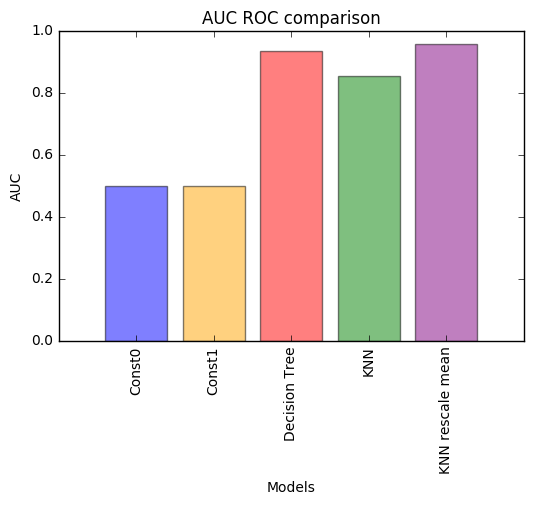

In [39]:
x = ('Const0', 'Const1', 'Decision Tree','KNN','KNN rescale mean')
x_pos = np.arange( len(x) )
y = model_comp['AUC']
 
plt.bar(x_pos, y.values, align='center', alpha=0.5, color=('b','orange','r','g','purple'))
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('AUC')
plt.xlabel('Models')
plt.title('AUC ROC comparison')

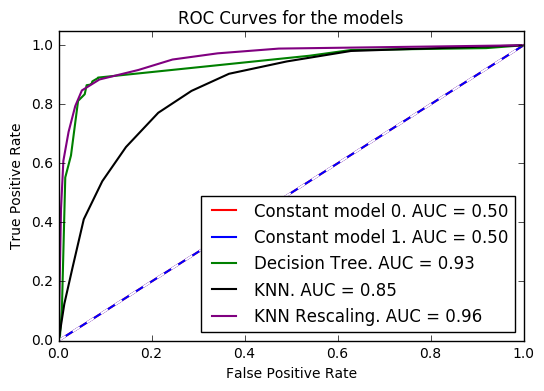

In [40]:
import matplotlib.pyplot as plt

plt.figure()
lw = 1.5

plt.plot(fpr_00, tpr_00, color='r',
         lw=lw, label='Constant model 0. AUC = %1.2f' % model_comp.ix[0, 'AUC'])

plt.plot(fpr1, tpr1, color='b',
         lw=lw, label='Constant model 1. AUC = %1.2f' % model_comp.ix[1, 'AUC'])

plt.plot(fpr_DT, tpr_DT, color='g',
         lw=lw, label='Decision Tree. AUC = %1.2f' % model_comp.ix[2, 'AUC'])

plt.plot(fpr_knn, tpr_knn, color='k',
         lw=lw, label='KNN. AUC = %1.2f' % model_comp.ix[3, 'AUC'])

plt.plot(fpr_knn_r, tpr_knn_r, color='purple',
         lw=lw, label='KNN Rescaling. AUC = %1.2f' % model_comp.ix[4, 'AUC'])

plt.plot([0, 1], [0, 1], color='white', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the models')
plt.legend(loc="best")
plt.show()


Compute pairs of precision and recall 

In [41]:
prec_00, recall_00, thresholds_00 = metrics.precision_recall_curve(y_true_sh, y_prob_00)
prec_11, recall_11, thresholds_11 = metrics.precision_recall_curve(y_true_sh, y_prob_11)
prec_DT, recall_DT, thresholds_DT = metrics.precision_recall_curve(y_true_sh, y_prob_DT_r)
prec_knn, recall_knn, thresholds_knn = metrics.precision_recall_curve(y_true_sh, y_prob_knn)
prec_knn_r, recall_knn_r, thresholds_knn_r = metrics.precision_recall_curve(y_true_sh, y_prob_knn_r)

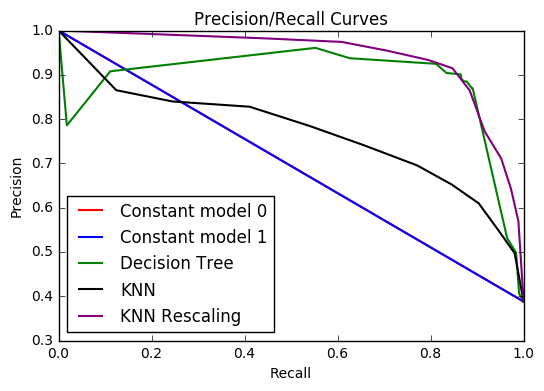

In [42]:
plt.figure()
lw = 1.5

plt.plot(recall_00, prec_00, color='r',
         lw=lw, label='Constant model 0' )

plt.plot(recall_11, prec_11, color='b',
         lw=lw, label='Constant model 1' )

plt.plot(recall_DT, prec_DT, color='g',
         lw=lw, label='Decision Tree' )

plt.plot(recall_knn, prec_knn, color='k',
         lw=lw, label='KNN' )

plt.plot(recall_knn_r, prec_knn_r, color='purple',
         lw=lw, label='KNN Rescaling' )

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curves')
plt.legend(loc="best")
plt.show()

## What maximal Recall of spam classification can models acheive if you have strict constraint on accuracy: it should not be below 90%?


From the Precision_recall_curve: we will find the intersection of the line y = 0.9 and of the Precision_recall_curve

In [43]:
def recall_when_precision_09 ( prec, recall ):
    ix = np.where( prec > 0.9 )[0]
    ix = ix[0]
    
    p_l = [ recall[ix - 1], prec[ix - 1] ]
    p_r = [ recall[ix], prec[ix] ]

    a = ( p_l[1] - p_r[1] )/ ( p_l[0] - p_r[0] )
    b = p_l[1] - a * p_l[0]

    x = ( 0.9 - b )/a
    return x

In [44]:
model_comp.insert ( len(model_comp.keys()), "Max Recall, Precision>=0.9", 0)

In [52]:
recalls_val = ( recall_when_precision_09( prec_00, recall_00),\
               recall_when_precision_09( prec_11, recall_11),\
               recall_when_precision_09( prec_DT, recall_DT),\
               recall_when_precision_09( prec_knn, recall_knn),\
               recall_when_precision_09( prec_knn_r, recall_knn_r) )

model_comp.ix[:,5] = recalls_val
# model_comp

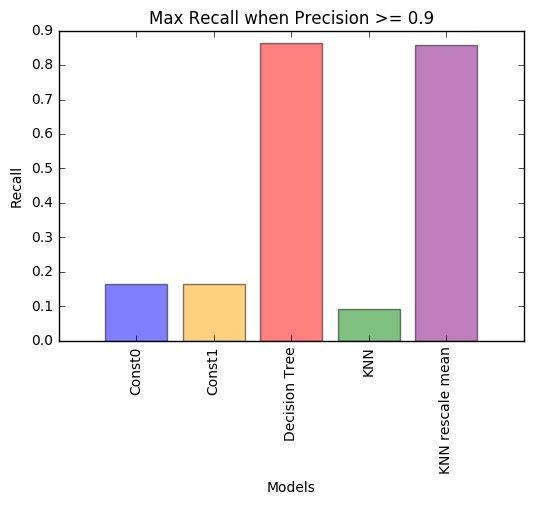

In [46]:
x = ('Const0', 'Const1', 'Decision Tree','KNN','KNN rescale mean')
x_pos = np.arange( len(x) )
y = model_comp.iloc[:,5]
 
plt.bar(x_pos, y.values, align='center', alpha=0.5, color=('b','orange','r','g','purple'))
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('Recall')
plt.xlabel('Models')
plt.title('Max Recall when Precision >= 0.9')

In [53]:
model_comp

,Accuracy,Precision,Recall,F1,AUC,"Max Recall, Precision>=0.9"
Const0,0.612117,0.000000,0.000000,0.000000,0.500000,0.163367
Const1,0.387883,0.387883,1.000000,0.558956,0.500000,0.163367
Decision Tree,0.914428,0.895425,0.882448,0.888889,0.933444,0.864892
KNN,0.777639,0.741348,0.655395,0.695726,0.854656,0.091962
KNN rescale mean,0.910056,0.914783,0.847021,0.879599,0.956184,0.857924


## 4. Cross-validation and parameter selection

 - Choose cross-validation method, one from described above. Fixate cross-validation split of `train` set. You should cross-validate on `train` samples from previous tasks, `test` should stay independent. Pay attention: when comparing models, cross-validation split must not change.
   - Choose one metric for optimization by grid search. _Example: AUC-ROC._
   - Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)
   - Find optimal set of parameters for KNN using grid search. Parameters for grid: K, metric, weight scheme.
   - ($\star$) [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) -  any test or metric that relies on random sampling with replacement. Can you use different bootstrapping methods for training and evaluating your models?

Repeated random sub-sampling

## Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)

In [47]:
from sklearn.grid_search import RandomizedSearchCV

parameters = {
    'criterion': ('gini', 'entropy'),
    'max_depth': ( 2,4,8,10,12,14,16 ),
    'max_features': ( 'auto', 'sqrt', 'log2' ),
    'min_samples_leaf': (1,2,3,4,5,7,10,13,15 )
}

In [48]:
%%time

clf_grid_s = RandomizedSearchCV ( DecisionTreeClassifier(), parameters, scoring='roc_auc', n_jobs=8, cv=5 )
clf_grid_s.fit ( X_r, y_r )

print ( "Parameters:", clf_grid_s.best_params_ )
print ( "Score:", clf_grid_s.best_score_ )

('Parameters:', {'max_features': 'auto', 'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 4})
('Score:', 0.94304716206725014)
Wall time: 5.35 s


In [49]:
parameters_knn = {
    'n_neighbors': [5,7,10,12,15,17,20],
    'metric': ( 'minkowski', 'manhattan', 'chebyshev', 'euclidean' ),
    'weights': ( 'uniform', 'distance' )
}

In [50]:
%%time


clf_grid_s_knn = RandomizedSearchCV ( KNeighborsClassifier(), parameters_knn, scoring='roc_auc', n_jobs=7, cv=5 )
clf_grid_s_knn.fit ( X_r, y_r )


print ( "Parameters:", clf_grid_s_knn.best_params_ )
print ( "Score:", clf_grid_s_knn.best_score_ )

('Parameters:', {'n_neighbors': 17, 'metric': 'euclidean', 'weights': 'distance'})
('Score:', 0.96856292039953662)
Wall time: 8.64 s


### sklearn version:

In [51]:
import sklearn
sklearn.__version__

'0.17.1'